In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [4]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_valid_path = "Fruits_Vegetables/validation"

In [5]:
img_width = 180
img_height = 180

In [7]:
batch_size = 32
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = batch_size,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    validation_split = False)


Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    validation_split = False)

Found 359 files belonging to 36 classes.


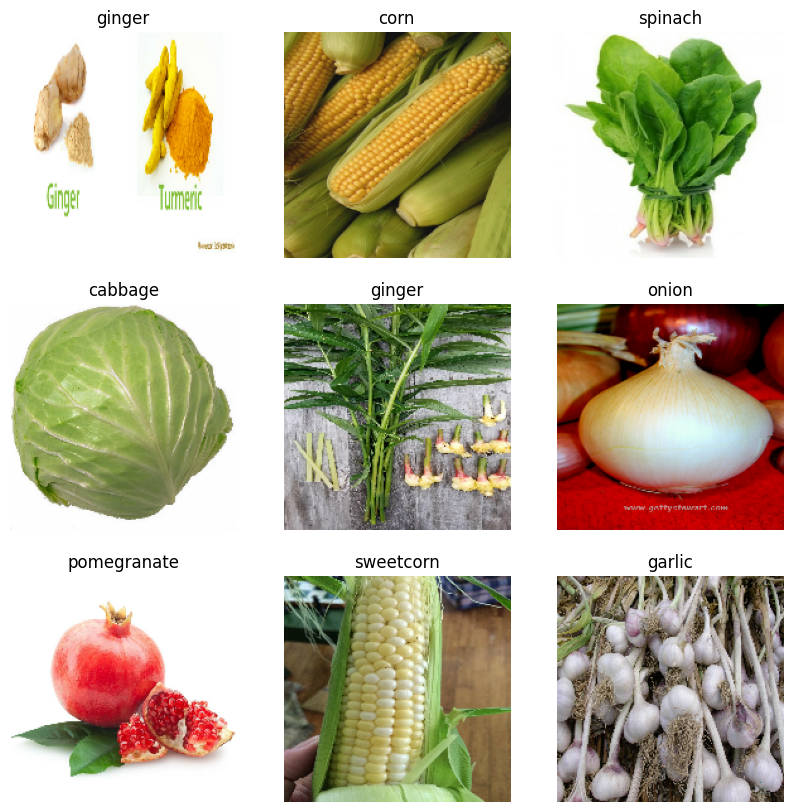

In [19]:
plt.figure(figsize = (10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [26]:
model = Sequential([
    layers.Rescaling(1./255), 
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [27]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [30]:
epochs = 25
history = model.fit(data_train, validation_data = data_val, epochs = epochs, batch_size = batch_size, verbose = 1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 262ms/step - accuracy: 0.0378 - loss: 3.9323 - val_accuracy: 0.2051 - val_loss: 2.9365
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.1821 - loss: 2.9021 - val_accuracy: 0.5413 - val_loss: 1.8536
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.4000 - loss: 2.1142 - val_accuracy: 0.7123 - val_loss: 1.0282
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.5741 - loss: 1.4789 - val_accuracy: 0.7949 - val_loss: 0.7534
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.7463 - loss: 0.8855 - val_accuracy: 0.9088 - val_loss: 0.4743
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - accuracy: 0.8464 - loss: 0.5459 - val_accuracy: 0.9231 - val_loss: 0.4103
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.8982 - loss: 0.3887 - val_accuracy: 0.9402 - val_loss: 0.3538
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.9274 - loss: 0.2932 - val_accu

Text(0.5, 1.0, 'Loss')

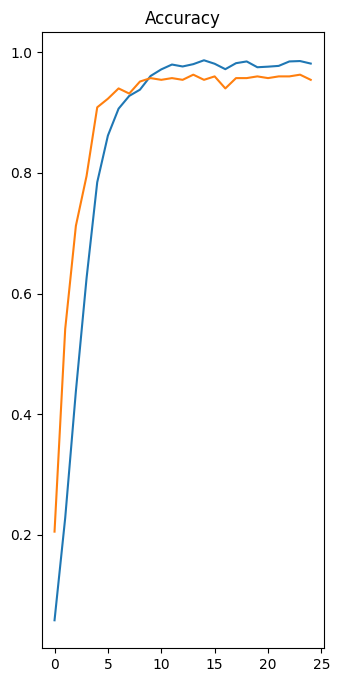

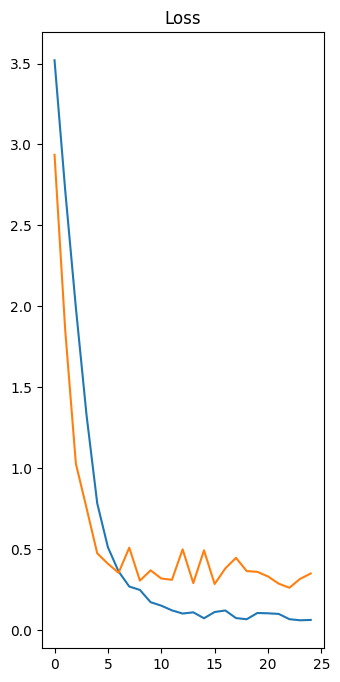

In [37]:
epochs_range = range(epochs)
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history ['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history ['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history ['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history ['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [53]:
image = 'banana.jpg'
image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [54]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [55]:
score = tf.nn.softmax(predict)

In [56]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 99.64
